In [1]:
import cudf
import cupy as cp
import plotly.graph_objects as go
import datashader as ds
import colorcet
import os
from statsmodels.regression import linear_model
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from cuml.preprocessing.model_selection import train_test_split

import graphviz

# model analysis
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_absolute_error

import xgboost as xgb


# Visualisation Imports
import numpy as np
import xarray as xr
# datashader
import datashader as ds
import datashader.transfer_functions as tf
from datashader.transfer_functions import shade
from datashader.transfer_functions import stack
from datashader.transfer_functions import dynspread
from datashader.transfer_functions import set_background
from datashader.transfer_functions import Images, Image
from datashader.colors import Elevation
from datashader.utils import orient_array

# holoviews
import holoviews as hv
from holoviews.plotting.plotly.dash import to_dash
from holoviews.element.tiles import CartoDark
from holoviews.operation.datashader import datashade, shade, dynspread, spread, rasterize
from holoviews.operation import decimate

# plotly
from plotly.colors import sequential
from plotly.subplots import make_subplots

# Dash Import
import dash
import dash_html_components as html
from jupyter_dash import JupyterDash

# XGBoost
import xgboost as xgb

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
DATA_PATH = '../../data/hycom'
RES_PATH = '../../results/hycom'

X_col_names = ['water_temp_0', 'salinity_0', 'water_temp_2', 'salinity_2', 'water_temp_4', 'salinity_4', 'water_temp_6', 'salinity_6', 'water_temp_8', 'salinity_8']

y_col_name = ['fCO2_SW@SST_uatm']

df = cudf.read_csv(os.path.join(RES_PATH, 'hycom_equinox_merged-201920.csv'))
df = df[df['WOCE_QC_FLAG'] == 2]
df.drop(['start_date', 'lat', 'lon', 'WOCE_QC_FLAG', 'easting', 'northing'], axis=1, inplace=True)

df = df.dropna(subset=X_col_names + y_col_name, axis=0)

df = df[df[y_col_name[0]] >= 0]

df.head()

,water_temp_0,salinity_0,water_temp_2,salinity_2,water_temp_4,salinity_4,water_temp_6,salinity_6,water_temp_8,salinity_8,xCO2_EQU_ppm,xCO2_ATM_interpolated_ppm,PRES_EQU_hPa,PRES_ATM@SSP_hPa,TEMP_EQU_C,SST_C,SAL_permil,fCO2_SW@SST_uatm,fCO2_ATM_interpolated_uatm,dfCO2_uatm
0,28.641375,36.191375,28.48175,36.194000,28.490375,36.193750,28.494625,36.193500,28.495625,36.193250,426.816,410.81,1014.72,1013.5662,29.14,29.1692,36.2848,410.02,393.66,16.36
1,26.471600,35.826667,26.42980,35.825867,26.429333,35.828200,26.426533,35.830333,26.422667,35.832533,403.554,417.55,1015.40,1014.5055,27.25,27.3215,35.3726,390.25,402.13,-11.88
2,29.324125,36.082625,29.24825,36.083875,29.235125,36.083500,29.218875,36.083000,29.198750,36.082250,460.100,410.89,1014.90,1014.5565,29.98,29.7258,36.2400,435.94,393.63,42.32
3,29.782625,36.122750,29.79925,36.123500,29.802750,36.124125,29.803750,36.124375,29.803375,36.124375,431.397,414.53,1012.47,1011.9442,29.88,29.9378,35.4666,413.24,395.84,17.40
4,30.861500,36.154125,30.54200,36.152875,30.412500,36.150375,30.245500,36.148625,29.899750,36.150000,459.698,417.82,1017.40,1017.0594,30.57,30.6395,36.3900,442.06,400.40,41.66


# Exploring Predictive Ability of Sentinel Data on fCO2_SW@SST_uatm

Dropping date, lat and lon since these are not expected to significantly impact relationships

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df[X_col_names], df[y_col_name])

In [78]:
params = {
    'max_depth':    4,
    'max_leaves':   2**8,
    'tree_method':  'gpu_hist',
    'objective':    'reg:squarederror',
    'grow_policy':  'lossguide',
    'eval_metric':  'mphe',
    'subsample':    '0.8'
}

## Splitting Data and Finding F-Score
### Baseline with No Interaction Variables
Input features are split into train/test sets, F-score for feature importance is plotted
From the following plot, water_temp at 0m, salinity at 0m, water_temp at 8m and water_temp at 2m have the highest F-test values.

In [80]:
dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test, y_test)

model = xgb.train(
    params, 
    dtrain, 
    evals=[(dtest, 'Test')],
    # set arbitarily high and implement early_stopping_rounds
    num_boost_round=999,
    # number of rounds without improvement 
    early_stopping_rounds=10
)

[0]	Test-mphe:279.38428
[1]	Test-mphe:195.34303
[2]	Test-mphe:136.53014
[3]	Test-mphe:95.37326
[4]	Test-mphe:66.56152
[5]	Test-mphe:46.39790
[6]	Test-mphe:32.32432
[7]	Test-mphe:23.69205
[8]	Test-mphe:19.27491
[9]	Test-mphe:17.03641
[10]	Test-mphe:15.98023
[11]	Test-mphe:15.53106
[12]	Test-mphe:15.37615
[13]	Test-mphe:15.34562
[14]	Test-mphe:15.35888
[15]	Test-mphe:15.38751
[16]	Test-mphe:15.41377
[17]	Test-mphe:15.43706
[18]	Test-mphe:15.45419
[19]	Test-mphe:15.46446
[20]	Test-mphe:15.47609
[21]	Test-mphe:15.48611
[22]	Test-mphe:15.49172
[23]	Test-mphe:15.49549


Best MAE found using baseline model above

In [81]:
model.best_score

15.345622

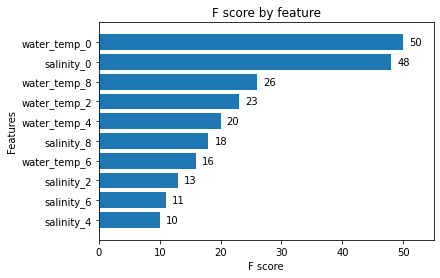

In [82]:
import matplotlib.pyplot as plt

ax = xgb.plot_importance(model, height=.8)
ax.grid(False)
ax.set_title('F score by feature')
plt.show()

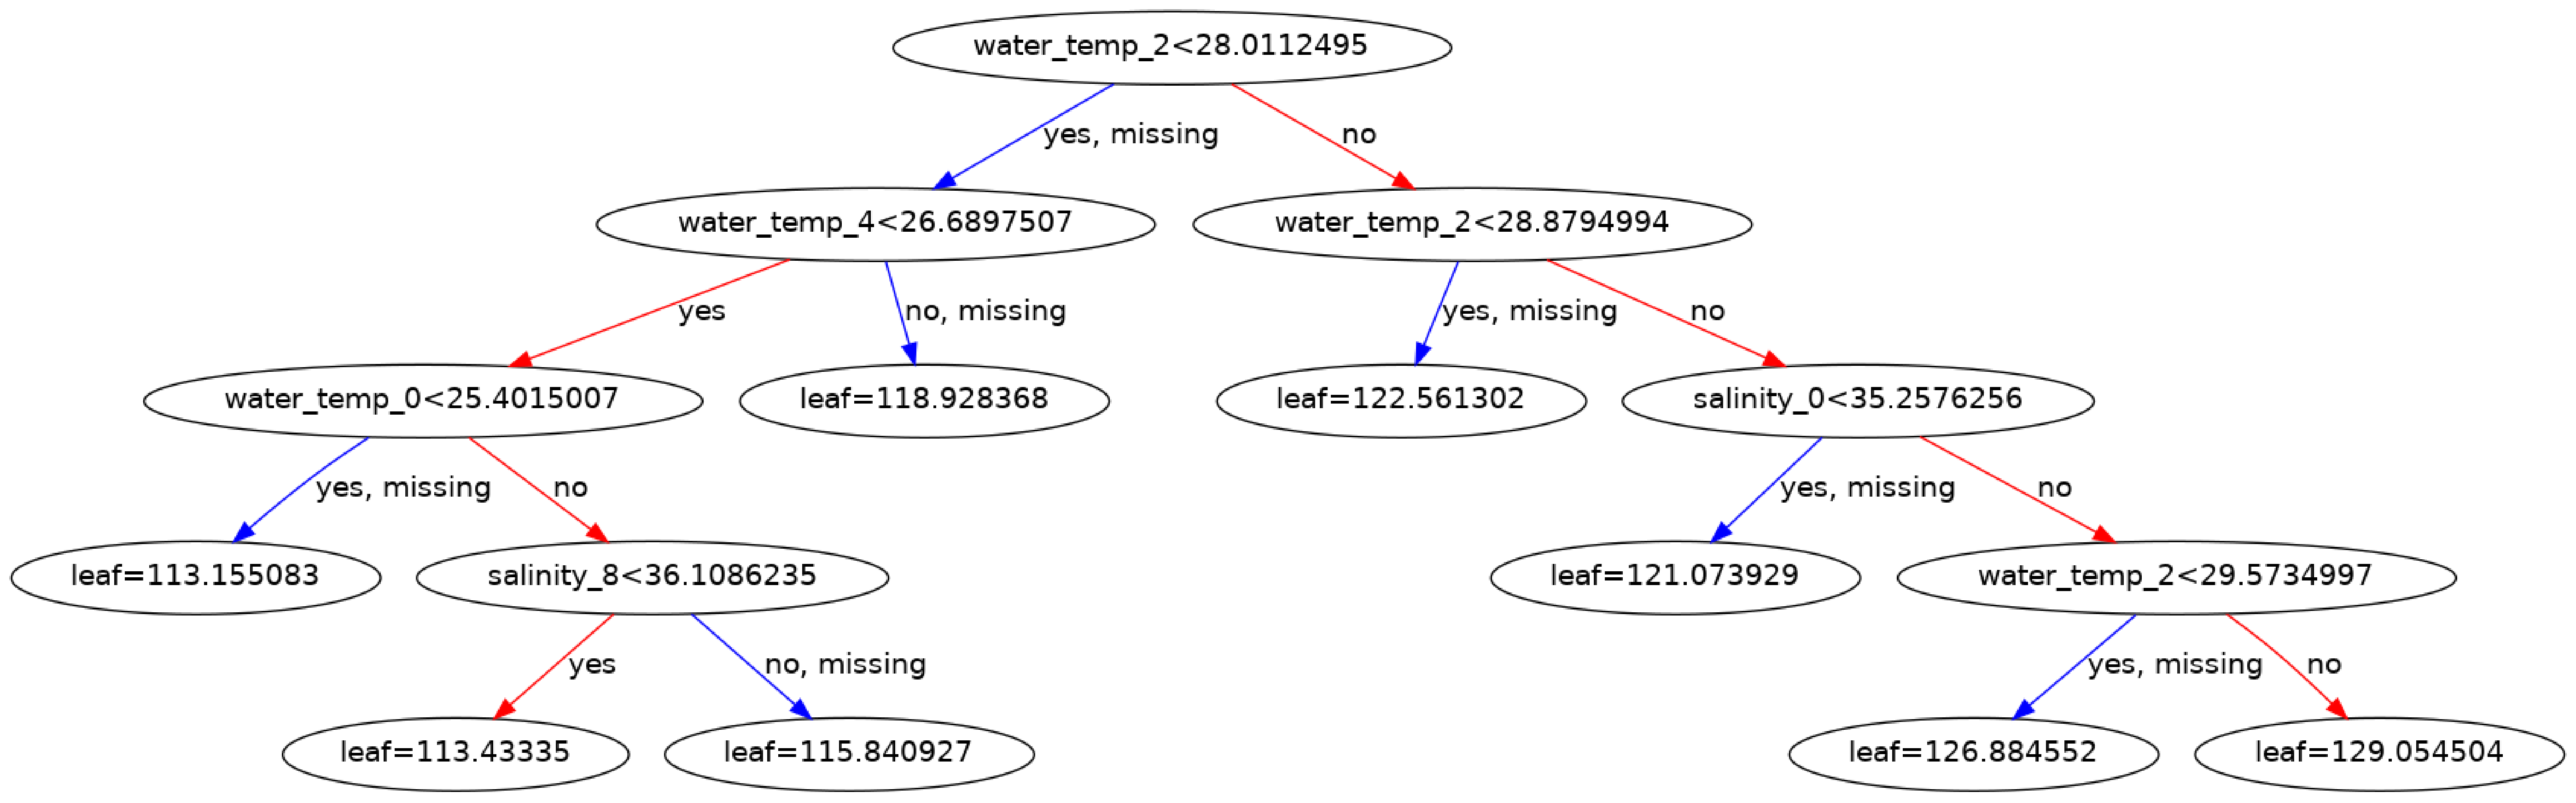

In [15]:
ax = xgb.plot_tree(model, num_trees=0, rankdir='TD')
# get current figure to set the size
fig = plt.gcf()

fig.set_size_inches(100, 400)

# Interaction Factors
## Baseline with Interaction Variables
F Score for all interaction variables plotted in bar chart below

In [84]:
df = df.dropna()

X, y = df[X_col_names], df[y_col_name]

poly_features = PolynomialFeatures(2, interaction_only=True, include_bias=False) 
X = poly_features.fit_transform(X.as_gpu_matrix())
X = cudf.DataFrame(X, columns=poly_features.get_feature_names(X_col_names))

X_train, X_test, y_train, y_test = train_test_split(X, y)

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

model = xgb.train(
    params, 
    dtrain, 
    evals=[(dtest, 'Test')],
    num_boost_round=999,
    early_stopping_rounds=10
)

model.best_score, model.best_iteration

(2.665092, 998)

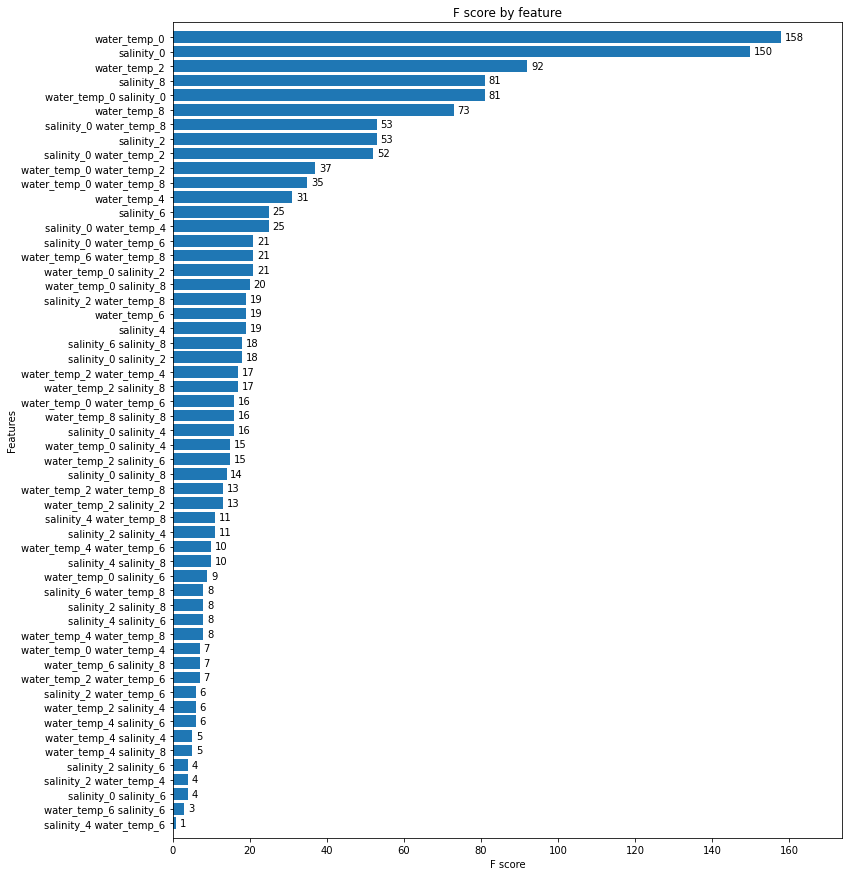

In [17]:
import matplotlib.pyplot as plt

ax = xgb.plot_importance(model, height=.8)
ax.grid(False)
ax.set_title('F score by feature')
ax.figure.set_size_inches(12, 15)
plt.show()

### Grid Search with Interaction Features

In [74]:
# Initial parameters

params = {
    'max_depth':    4,
    'max_leaves':   2**8,
    'tree_method':  'gpu_hist',
    'objective':    'reg:squarederror',
    'eval_metric': 'mphe'
}

In [85]:
min_error = float("Inf")
best_params = None

grid_search_params = [
    (max_depth, min_child_weight, subsample, eta)
    for max_depth in range(3,8) 
    for min_child_weight in range(5,7)
    for subsample in [i/10 for i in range(7, 10)]
    for eta in [0.3, 0.2, 0.1, 0.05, 0.01, 0.005]
]

for max_depth,min_child_weight,subsample,eta in grid_search_params:
    print(f'CV with max_depth={max_depth}, min_child_weight={min_child_weight}, eta={eta}')

    params['max_depth'] = max_depth
    params['subsample'] = subsample
    params['eta'] = eta
    params['min_child_weight'] = min_child_weight

    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=999,
        seed=42,
        nfold=5,
        early_stopping_rounds=10
    )
    
    mean_error = cv_results['test-mphe-mean'].min()
    boost_rounds = cv_results['test-mphe-mean'].argmin()
    
    
    print(f'\tmphe {mean_error} for {boost_rounds} rounds')
    
    if mean_error < min_error:
        min_mae = mean_error
        best_params = (max_depth,min_child_weight,subsample,eta)


CV with max_depth=3, min_child_weight=5, eta=0.3
	mphe 3.4501038 for 998 rounds
CV with max_depth=3, min_child_weight=5, eta=0.2
	mphe 3.656733 for 998 rounds
CV with max_depth=3, min_child_weight=5, eta=0.1
	mphe 3.9763466000000003 for 998 rounds
CV with max_depth=3, min_child_weight=5, eta=0.05
	mphe 4.2592796 for 998 rounds
CV with max_depth=3, min_child_weight=5, eta=0.01
	mphe 4.7481268 for 998 rounds
CV with max_depth=3, min_child_weight=5, eta=0.005
	mphe 5.3262198 for 998 rounds
CV with max_depth=3, min_child_weight=5, eta=0.3
	mphe 3.4357734 for 998 rounds
CV with max_depth=3, min_child_weight=5, eta=0.2
	mphe 3.6476156000000004 for 998 rounds
CV with max_depth=3, min_child_weight=5, eta=0.1
	mphe 3.9794952 for 998 rounds
CV with max_depth=3, min_child_weight=5, eta=0.05
	mphe 4.264534599999999 for 998 rounds
CV with max_depth=3, min_child_weight=5, eta=0.01
	mphe 4.7498218 for 998 rounds
CV with max_depth=3, min_child_weight=5, eta=0.005
	mphe 5.323658399999999 for 998 rounds

KeyboardInterrupt: 

In [1]:
# (max_depth,min_child_weight,subsample,eta)


NameError: name 'best_params' is not defined

### Feature Selection

Most important features are selected and a new model is trained and evaluated using MAE
This MAE found is lower than MAE found when using Lasso Regression

In [19]:
X_cols_sub = ['water_temp_0', 'salinity_0', 'water_temp_2', 'salinity_8', 'water_temp_0 salinity_0']


dtrain_sub = xgb.DMatrix(X_df[X_cols_sub], y_train)
model = xgb.train(params, dtrain_sub, num_boost_round=100)

In [29]:
df = df.dropna()
poly_features = PolynomialFeatures(2, interaction_only=True, include_bias=False) 
X_inter = poly_features.fit_transform(df[X_col_names].as_gpu_matrix())
X_df = cudf.DataFrame(X_inter, columns=poly_features.get_feature_names(X_col_names))

X_df = X_df[X_cols_sub]

X_train, X_test, y_train, y_test = train_test_split(X_df, df[y_col_name])

dtrain = xgb.DMatrix(X_train, y_train)

model = xgb.train(params, dtrain, num_boost_round=100)


x_test_matrix = xgb.DMatrix(X_test)
y_pred = model.predict(x_test_matrix)
mean_absolute_error(y_test.as_gpu_matrix(), y_pred)

5.065697661299631